In [1]:
import scienceplots
import matplotlib.pyplot as plt
import numpy as np
from lmfit import Model
import os
import sys

sys.path.append("../..")

from blume.process import read, compute, plot_file
from blume.run import Results, ModelParameters
from blume.model.post_props import Prop

plt.style.use("science")
plt.rcParams["text.usetex"] = True

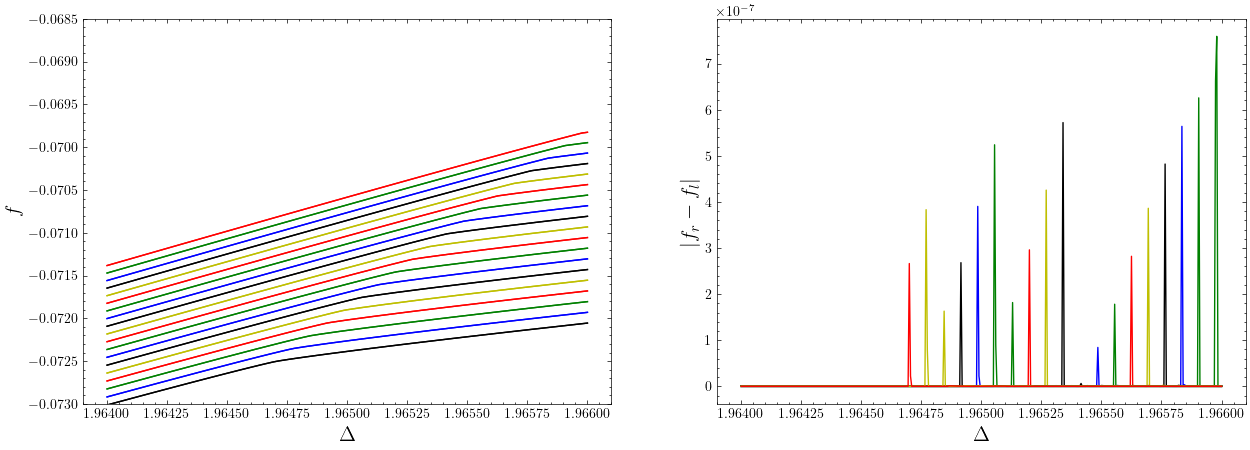

In [3]:
T_range = [T for T in np.arange(0.608, 0.6126, 0.00025)]
colors = ["r", "g", "b", "k", "y"]
fig, axs = plt.subplots(ncols = 2, figsize=(15, 5))
delta_stars = []
max_subtracted = []

for idx, temp in enumerate(T_range):
    data_inv = read('16-06 06:34', f"temperature{temp}")
    data = read('16-06 01:14', f"temperature{temp}")
    energies = compute(Prop.f, data)
    energies_inv = compute(Prop.f, data_inv)
    subtracted = [abs(e1 - e2) for e1, e2 in zip(energies, energies_inv[::-1])]
    axs[0].plot(data["couplings"], energies, label=f"T = {round(temp,4)}", color = colors[idx % 5])
    axs[0].plot(data_inv["couplings"], energies_inv, color = colors[idx % 5])
    max_subtracted.append(max(subtracted))
    idx = subtracted.index(max(subtracted))
    delta_stars.append(data["couplings"][idx])
    axs[1].plot(data["couplings"], subtracted, label = f"T = {round(temp,4)}",  color = colors[idx % 5])


axs[0].set_xlabel("$\Delta$", fontsize = 15)
axs[0].set_ylim(-0.0730, -0.0685)
axs[0].set_ylabel("$f$", fontsize =15)
axs[1].set_xlabel("$\Delta$", fontsize = 15)
axs[1].set_ylabel(r"$|f_r - f_l|$", fontsize =15)

plt.show()

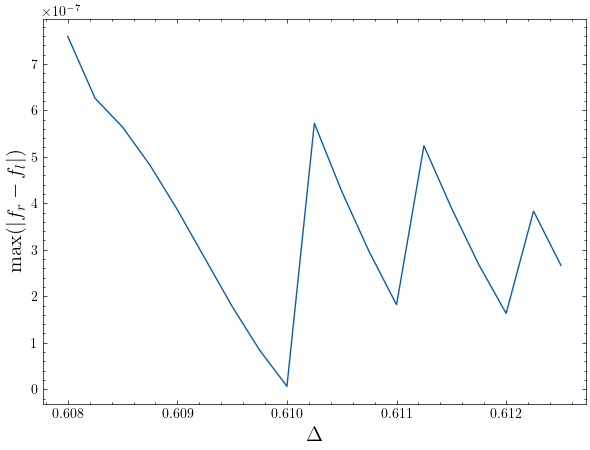

In [4]:
plt.figure(figsize= (7,5))
plt.plot(T_range, max_subtracted, "-")
plt.xlabel("$\Delta$", fontsize=15)
plt.ylabel(r"$\text{max}(|f_r - f_l|)$", fontsize=15)

plt.show()

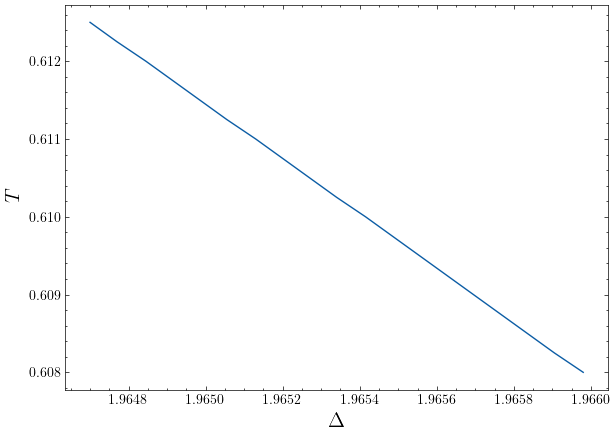

In [5]:
plt.figure(figsize = (7 ,5))
plt.plot(delta_stars, T_range)
plt.xlabel("$\Delta$", fontsize=15)
plt.ylabel("$T$", fontsize=15)
plt.show()

In [10]:
result = Results()
params = ModelParameters(model = "blume", var_range=[8, 12, 16, 20, 26], tol=1e-10, max_steps=int(10e9), coupling=delta_stars[0])
result.get(params, sweeping_param="chi")

100%|██████████| 5/5 [00:00<00:00, 11.36it/s]

Saving data in folder: '16-06 15:20(1)'
Done 



In [11]:
data = read('16-06 15:20(1)', "data")
corrs = compute(Prop.xi, data)